
# Project: Analyze TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.

### Questions

1. Which genres are more popular in different years?
2. What are the common attributes of movies with high revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load the data csv file.

In [2]:
df = pd.read_csv('/home/dhanya/Downloads/tmdb-movies.csv')

#First 5 rows.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

* The data has 10866 rows and 21 columns.

In [4]:
#Find the datatypes.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#Change release date to datetime format.
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

Scientific Notation is difficult to understand. So suppress scientific notation.

In [7]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


Some columns such as id, tagline and so on seems unnecessary. Drop these columns.

In [9]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis = 1, inplace = True)

In [10]:
#Fix the genres column.
df['genres']=df['genres'].str.split("|",expand=True)

## Data Cleaning

In [11]:
#Find number of missing values.
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

* We can see that genre and director columns have missing values. 

Remove rows with missing values.

In [12]:
cols =  ['director','genres']
df = df.dropna()

In [13]:
df.shape

(10801, 13)

In [14]:
#See if there are any duplicated rows.
df[df.duplicated() == True]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.60,30000000,967000,TEKKEN,Dwight H. Little,92,Crime,2010-03-20,110,5.00,2010,"30,000,000.00","967,000.00"


In [15]:
#Re move duplicated row.
df = df[df.duplicated() == False]

In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00"
mean,0.65,"14,711,137.32","40,065,576.47",102.19,218.60,5.97,"2,001.29","17,654,371.81","51,677,135.51"
std,1.00,"30,986,766.73","117,319,262.67",30.78,577.17,0.93,12.82,"34,384,031.76","145,018,221.35"
min,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,0.39,0.00,0.00,99.00,39.00,6.00,"2,006.00",0.00,0.00
75%,0.72,"15,643,737.00","24,554,092.75",111.25,147.00,6.60,"2,011.00","21,033,371.65","34,087,432.27"
max,32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


We can see that the budget and revenue columns are 0.00 for most rows. Replace them with mean value.

In [17]:
df.replace(0,df.mean(axis=0),inplace=True)

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00","10,800.00"
mean,0.65,"22,388,171.58","62,146,160.84",102.45,218.60,5.97,"2,001.29","26,867,338.43","80,156,979.07"
std,1.00,"28,076,485.47","111,316,929.42",30.34,577.17,0.93,12.82,"30,573,040.84","136,920,469.26"
min,0.00,1.00,2.00,2.00,10.00,1.50,"1,960.00",0.92,2.37
25%,0.21,"14,711,137.32","40,065,576.47",90.00,17.00,5.40,"1,995.00","17,654,371.81","51,677,135.51"
50%,0.39,"14,711,137.32","40,065,576.47",99.00,39.00,6.00,"2,006.00","17,654,371.81","51,677,135.51"
75%,0.72,"15,643,737.00","40,065,576.47",111.25,147.00,6.60,"2,011.00","21,033,371.65","51,677,135.51"
max,32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [19]:
df.shape

(10800, 13)

* The final dataframe has 10800 rows and 13 columns.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which years had the most popular movies?

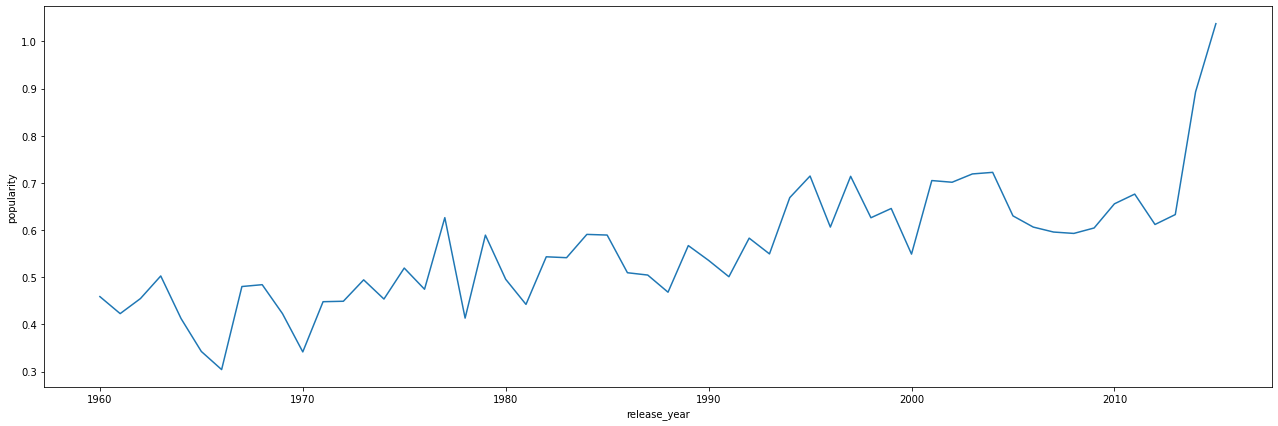

In [20]:
plt.figure(figsize = (22,7))
sns.lineplot(x = 'release_year', y ='popularity', data = df, ci=None)
plt.show()

* It seems that the movies released in 2014 and 2015 are the most popular. But this may be also due to other factors like a larger number of voters.

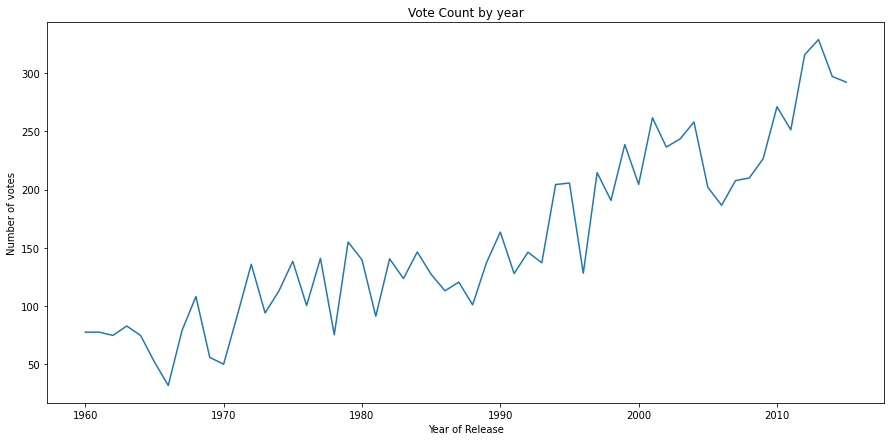

In [21]:
df1 = df.groupby('release_year')['vote_count'].mean()
df1.plot(figsize = (15,7))
plt.xlabel('Year of Release')
plt.ylabel('Number of votes')
plt.title('Vote Count by year')
plt.show()

* Thus the higher popularity of movies in recent years maybe due to the higher vote count.

### 2. Does bigger budget movies always yield better revenues?

In [22]:
#Convert popularity to a categorical feature based on quartile range.
def convert_cat(col):
    minimum =df[col].min()
    q1 =df[col].quantile(0.25)
    q2 =df[col].quantile(0.5)
    q3 =df[col].quantile(0.75)
    maximum =df[col].max()
    edges=[minimum, q1, q2, q3, maximum]
    cat_names=['Low','Average','High','Very High']
    return pd.cut(df[col],edges, labels=cat_names)                                 
df['popularity_rating']=convert_cat('popularity')

<Figure size 1080x720 with 0 Axes>

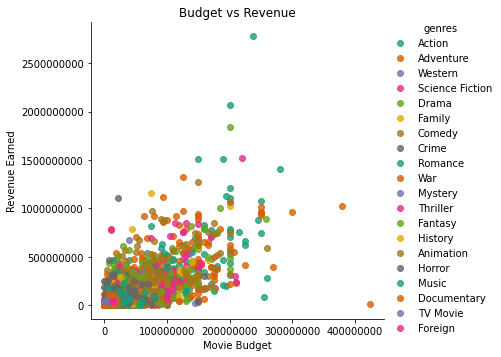

In [23]:
plt.figure(figsize = (15,10))
sns.lmplot( x = 'budget', y = 'revenue', data = df,hue = 'genres', fit_reg=False,palette = 'Dark2')
plt.ticklabel_format(style='plain')
plt.xlabel('Movie Budget')
plt.ylabel('Revenue Earned')
plt.title('Budget vs Revenue')
plt.show()

* Most low budget movies have comparitively low revenues as well. However, they may have still yielded a profit, because of their lower budget.
* The highest grossing movies have somewhat medium budget.
* Action movies have some of the biggest revenues

### 3. Does runtime affect the popularity?

<Figure size 1440x360 with 0 Axes>

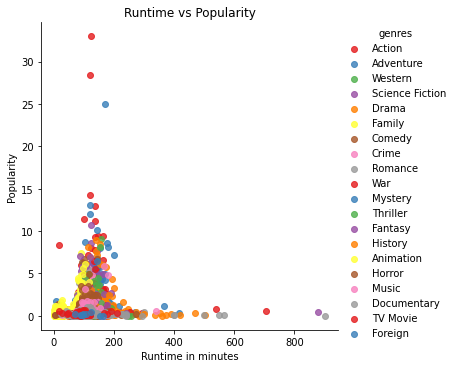

In [24]:
plt.figure(figsize = (20,5))
sns.lmplot( x = 'runtime', y = 'popularity', data = df, hue = 'genres', palette = 'Set1',fit_reg=False)
plt.xlabel('Runtime in minutes')
plt.ylabel('Popularity')
plt.title('Runtime vs Popularity')
plt.show()

* We can see that movies with smaller to medium runtimes are more popular.
* Movies with a high runtime are the least popular.
* Action movies with low runtimes are the most popular.

### 4. What is the distribution of movie duration?

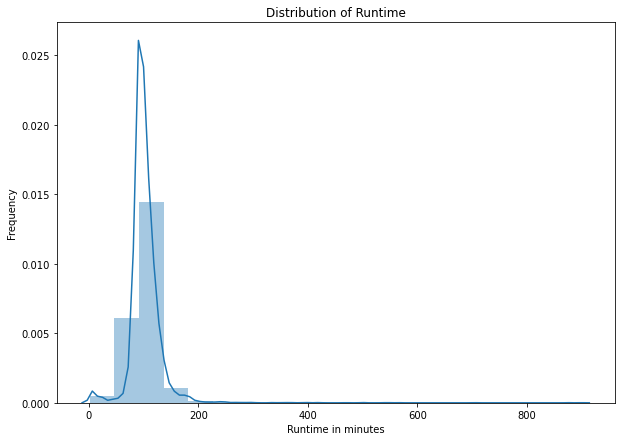

In [25]:
plt.figure(figsize = (10,7))
sns.distplot(df['runtime'], bins = 20)
plt.xlabel('Runtime in minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime')
plt.show()

* We can see that most movies have a duration around 150 minutes.They also make up the most popular movies as per the previous observation.

### 5. Which genre of movies are the most and least popular?

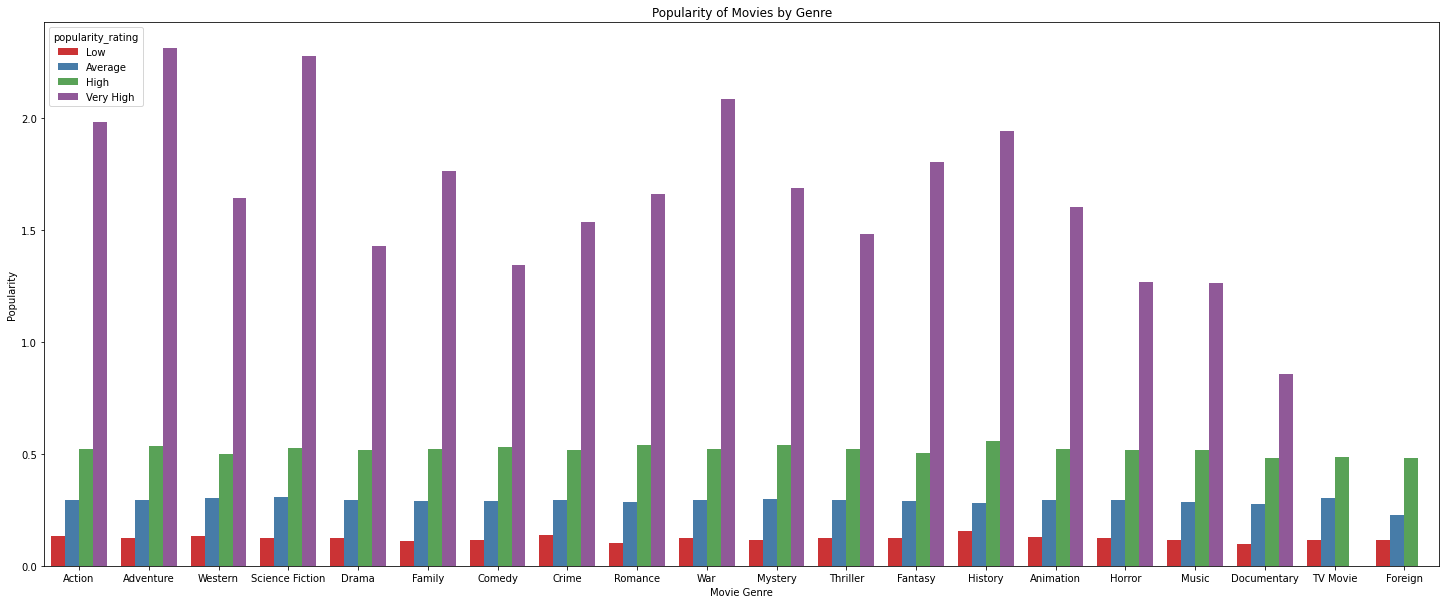

In [26]:
plt.figure(figsize = (25,10))
sns.barplot(x = 'genres', y ='popularity', data = df,hue = 'popularity_rating',palette = 'Set1', ci=None)
plt.xlabel('Movie Genre')
plt.ylabel('Popularity')
plt.title('Popularity of Movies by Genre')
plt.show()

* Adventure is the most popular genre followed by sci-fi.
* Documentaries are the least popular.

<a id='conclusions'></a>
## Conclusions
The following conclusions can be drawn from the data analysis:
* The number of votes have largely increased in the recent years.
* This may have led to recent movies having a higher popularity rating than older movies.
* Lower budget movies have comparitively lower revenues. But they may still be making a profit since they have a low budget.
* Movies with a lesser runtime are more popular among the audience. Large runtime may have led to a movie being less popular.
* Adventure movies are the most popular.
* Documenatries are the least popular.